<h1>IMPORTING PACKAGES</h1>

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import LabelEncoder

# Data Loading

In [2]:
# Data Loading
df = pd.read_csv(r'data.csv')

In [3]:
df.head()

,pH,EC,OC,OM,N,P,K,Zn,Fe,Cu,Mn,Sand,Silt,Clay,CaCO3,CEC,Output
0,7.74,0.40,0.01,0.01,75,20.0,279,0.48,6.4,0.21,4.7,84.3,6.8,8.9,6.72,7.81,Fertile
1,9.02,0.31,0.02,0.03,85,15.7,247,0.27,6.4,0.16,5.6,90.4,3.9,5.7,4.61,7.19,Fertile
2,7.80,0.17,0.02,0.03,77,35.6,265,0.46,6.2,0.51,6.1,84.5,6.9,8.6,1.53,12.32,Fertile
3,8.36,0.02,0.03,0.05,106,6.4,127,0.50,3.1,0.28,2.3,93.9,1.7,4.4,0.00,1.60,Non Fertile
4,8.36,1.08,0.03,0.05,96,10.5,96,0.31,3.2,0.23,4.1,91.5,4.1,4.4,9.08,7.21,Non Fertile


# Here we have 100 observations with 17 features in our dataset

In [4]:
#Printing the shape of the dataset 
df.shape

(100, 17)

In [5]:
#Getting the data types of all the columns
df.dtypes

pH        float64
EC        float64
OC        float64
OM        float64
N           int64
P         float64
K           int64
Zn        float64
Fe        float64
Cu        float64
Mn        float64
Sand      float64
Silt      float64
Clay      float64
CaCO3     float64
CEC       float64
Output     object
dtype: object

# Here in our dataset we have both object and float data types

In [6]:
#check details about the data set
print("Here is the information about our data set which includes the number of columns, number of rows, data types , null counts and the memory size as well :")
df.info()

Here is the information about our data set which includes the number of columns, number of rows, data types , null counts and the memory size as well :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pH      100 non-null    float64
 1   EC      100 non-null    float64
 2   OC      100 non-null    float64
 3   OM      100 non-null    float64
 4   N       100 non-null    int64  
 5   P       100 non-null    float64
 6   K       100 non-null    int64  
 7   Zn      100 non-null    float64
 8   Fe      100 non-null    float64
 9   Cu      100 non-null    float64
 10  Mn      100 non-null    float64
 11  Sand    100 non-null    float64
 12  Silt    100 non-null    float64
 13  Clay    100 non-null    float64
 14  CaCO3   100 non-null    float64
 15  CEC     100 non-null    float64
 16  Output  100 non-null    object 
dtypes: float64(14), int64(2), object(1)


In [7]:
#Here is the unique values in our data 
print("The unique values in each and every column in our data are as below:")
df.nunique()

The unique values in each and every column in our data are as below:


pH        71
EC        48
OC        40
OM        40
N         76
P         80
K         84
Zn        61
Fe        46
Cu        50
Mn        53
Sand      71
Silt      63
Clay      59
CaCO3     72
CEC       95
Output     2
dtype: int64

In [8]:
print('The statistical information about our data set is as below :')
df.describe(include='all').T

The statistical information about our data set is as below :


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
pH,100.0,NaN,NaN,NaN,8.2865,0.527127,6.52,8.06,8.33,8.58,9.48
EC,100.0,NaN,NaN,NaN,0.2903,0.26529,0.02,0.13,0.18,0.3425,1.58
OC,100.0,NaN,NaN,NaN,0.1952,0.170486,0.01,0.08,0.14,0.24,0.74
OM,100.0,NaN,NaN,NaN,0.3314,0.293942,0.01,0.13,0.24,0.41,1.27
N,100.0,NaN,NaN,NaN,172.76,60.291735,75.0,125.0,162.0,218.0,278.0
P,100.0,NaN,NaN,NaN,13.1955,8.391076,1.8,7.725,10.45,18.5,35.6
K,100.0,NaN,NaN,NaN,214.11,86.966834,70.0,145.0,187.0,265.75,480.0
Zn,100.0,NaN,NaN,NaN,0.4948,0.257413,0.04,0.3175,0.46,0.625,1.3
Fe,100.0,NaN,NaN,NaN,4.525,1.833767,1.0,3.2,4.15,6.1,9.1
Cu,100.0,NaN,NaN,NaN,0.3066,0.173498,0.01,0.18,0.28,0.4025,0.73


# The above table shows the statistical information about the each and every column of our data set.

In [9]:
# Let's Check the duplicated values in our data
df.duplicated().sum()

0

# From the above we came to know that there is no duplicate values in our data set.

# Exploratory Data Analysis (EDA)

In [10]:
#Let's check the null values present in the data set 
df.isnull().sum()

pH        0
EC        0
OC        0
OM        0
N         0
P         0
K         0
Zn        0
Fe        0
Cu        0
Mn        0
Sand      0
Silt      0
Clay      0
CaCO3     0
CEC       0
Output    0
dtype: int64

# From the above we checking null values that there are some missing values in emp_title,emp_length,title, revol_util, mort_acc and Pub_rec_bankruptcies column

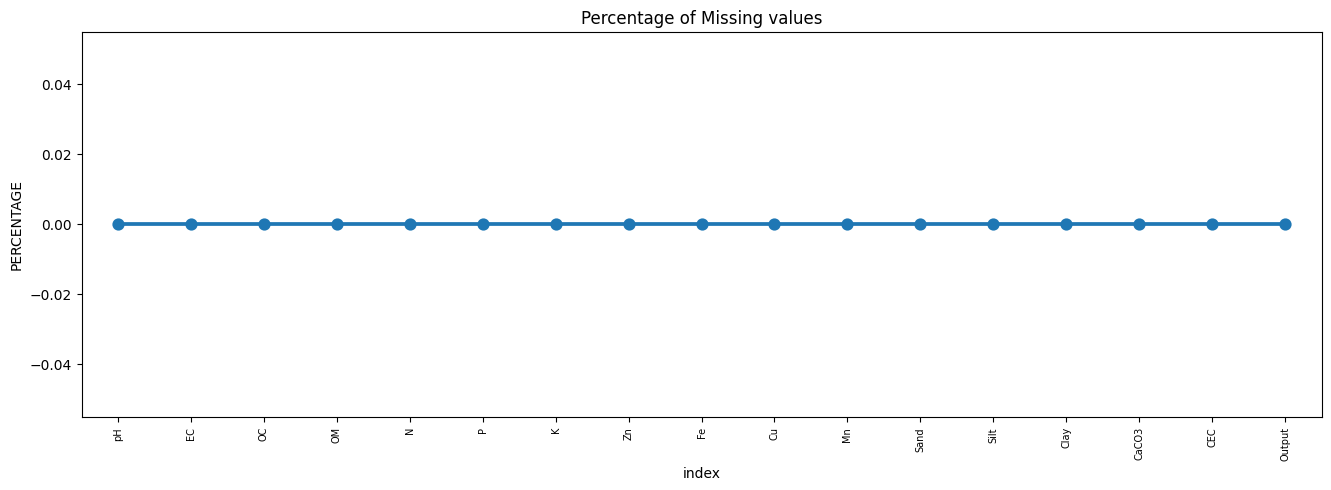

In [14]:
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

<Axes: >

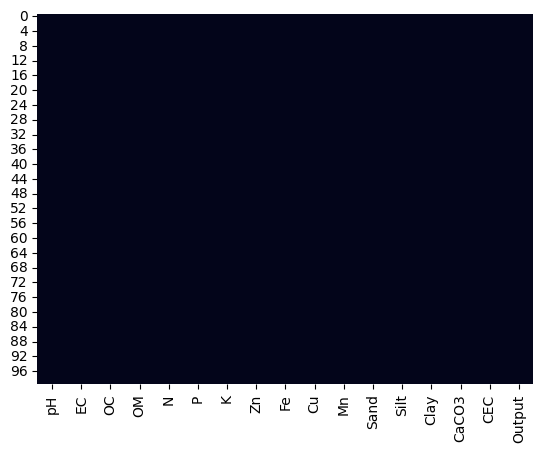

In [15]:
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

In [16]:
print("Here are the columnn names of our data set :")
df.columns

Here are the columnn names of our data set :


Index(['pH', 'EC', 'OC', 'OM', 'N', 'P', 'K', 'Zn', 'Fe', 'Cu', 'Mn', 'Sand',
       'Silt', 'Clay', 'CaCO3', 'CEC', 'Output'],
      dtype='object')

In [17]:
df.Output.value_counts()

Output
Fertile        50
Non Fertile    50
Name: count, dtype: int64

<Axes: xlabel='Output', ylabel='count'>

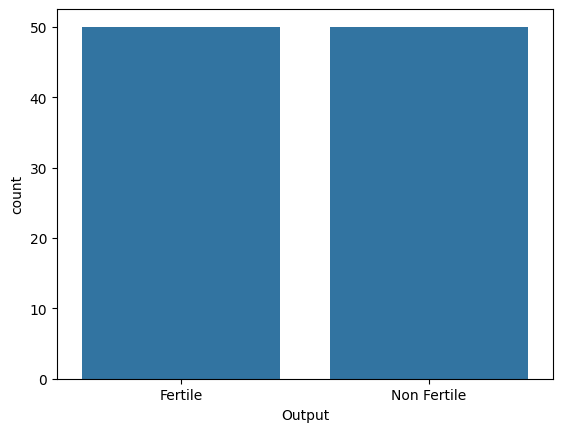

In [18]:
#let's see loan_status by using countplot
sns.countplot(x=df.Output)

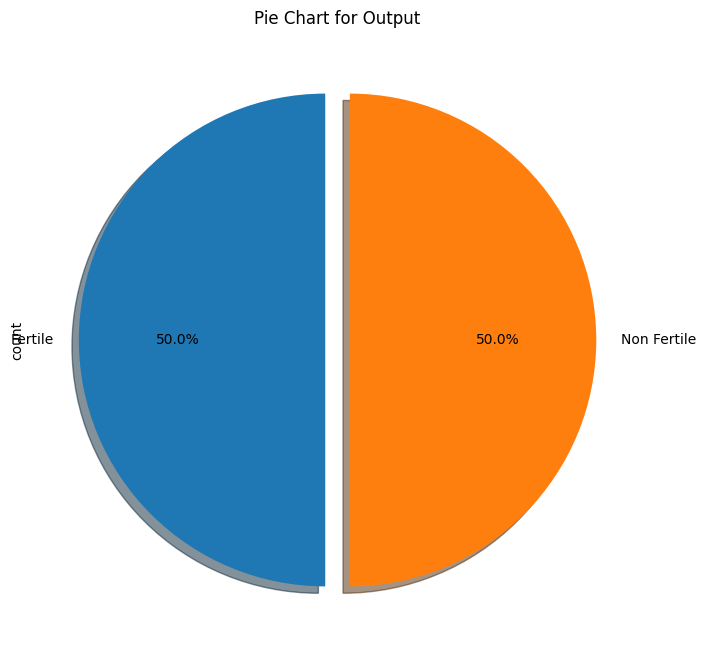

In [19]:
#To get the pie chart to analyze loan_status
df ['Output'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(8,8))
plt.title('Pie Chart for Output')
plt.show()

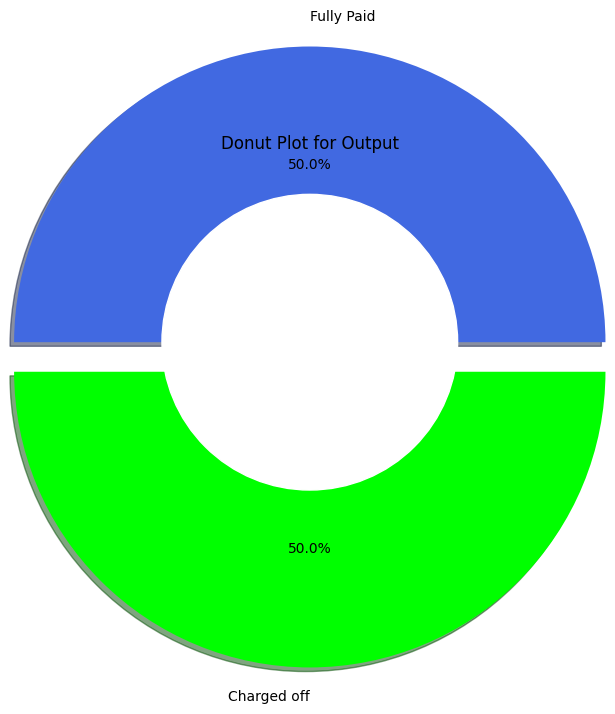

In [20]:
#To get the Donut Plot to analyze loan_status
data1 = df['Output'].value_counts()
explode = (0, 0.2)
plt.pie(data1, explode = explode,autopct='%1.1f%%',shadow=True,radius = 2.0, labels = ['Fully Paid','Charged off'],colors=['royalblue' ,'lime'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for Output')
plt.show()

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

ValueError: could not convert string to float: 'Fertile'

<Figure size 1200x800 with 0 Axes>

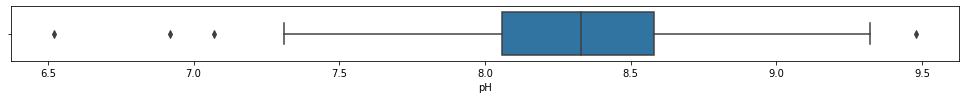

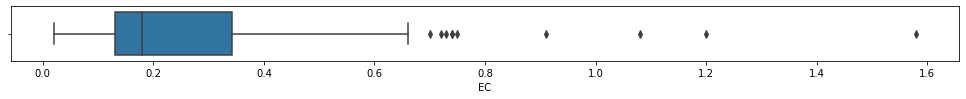

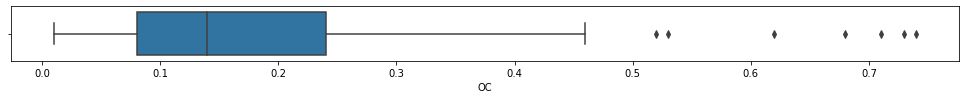

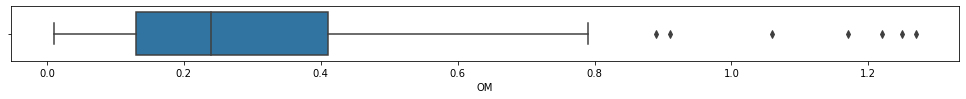

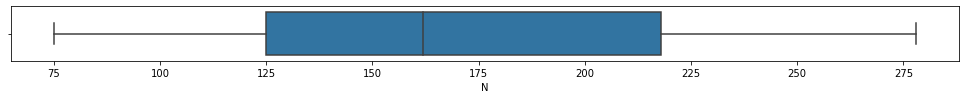

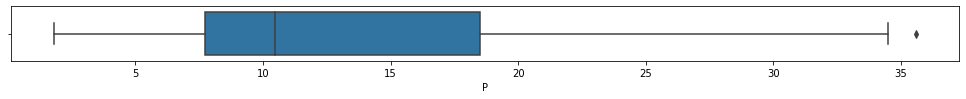

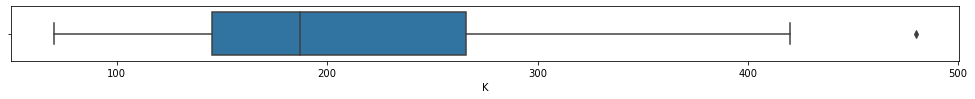

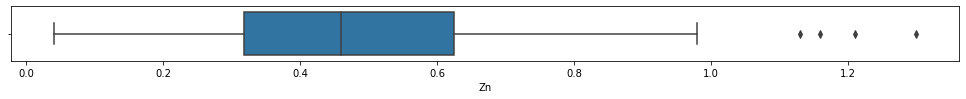

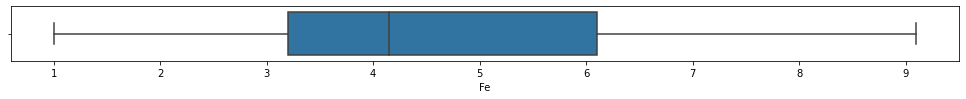

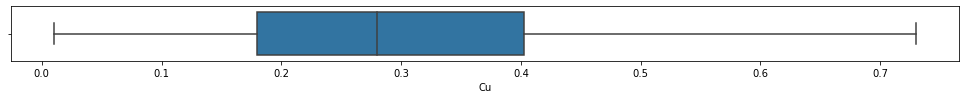

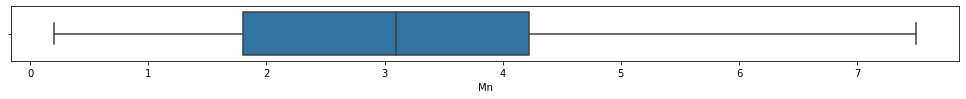

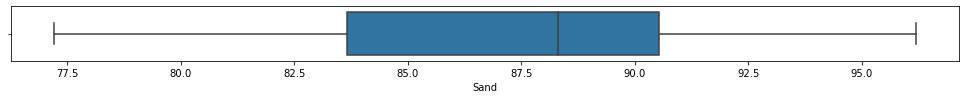

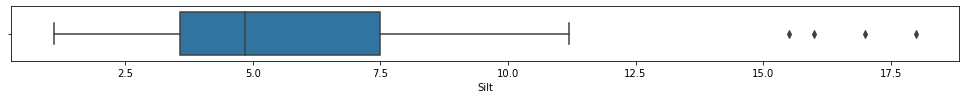

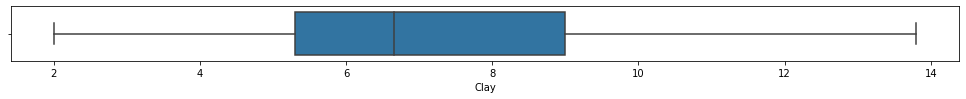

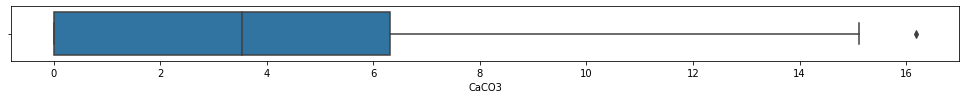

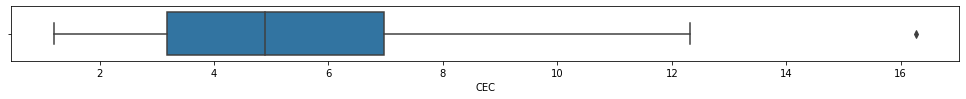

In [ ]:
# Univariate Analysis
#Printing boxplot for each numerical column present in the data set
df1=df.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)
plt.show()

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
c:\program files\python36\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consu

<Figure size 1224x72 with 0 Axes>

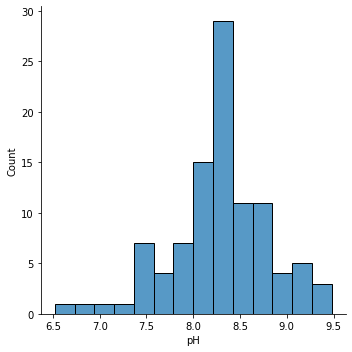

<Figure size 1224x72 with 0 Axes>

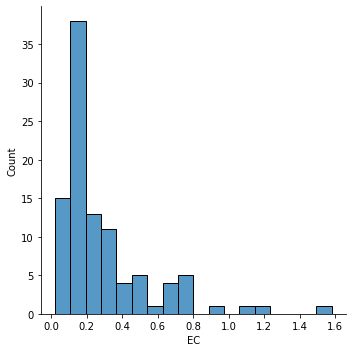

<Figure size 1224x72 with 0 Axes>

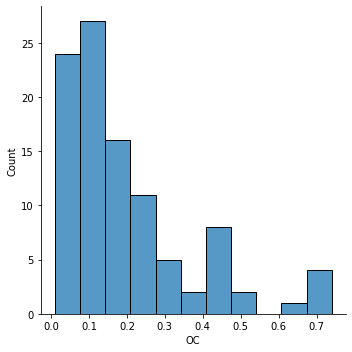

<Figure size 1224x72 with 0 Axes>

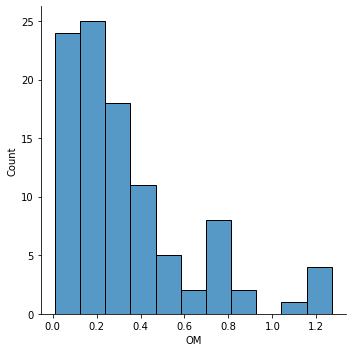

<Figure size 1224x72 with 0 Axes>

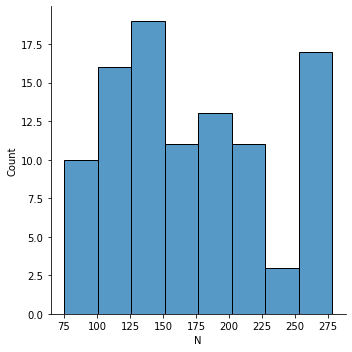

<Figure size 1224x72 with 0 Axes>

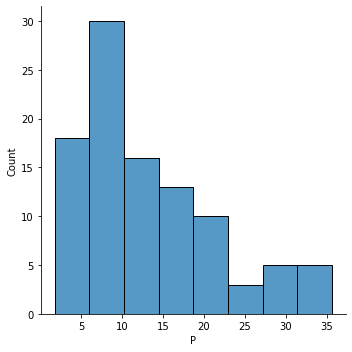

<Figure size 1224x72 with 0 Axes>

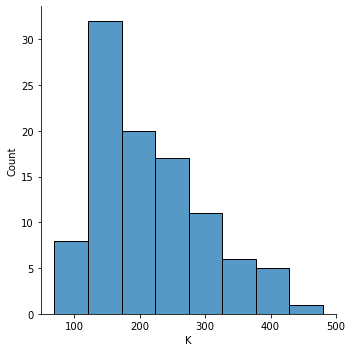

<Figure size 1224x72 with 0 Axes>

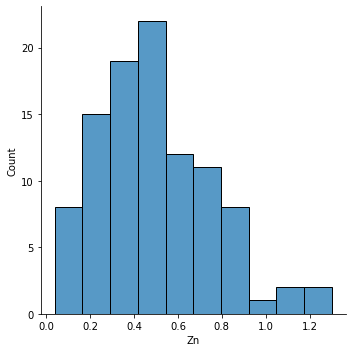

<Figure size 1224x72 with 0 Axes>

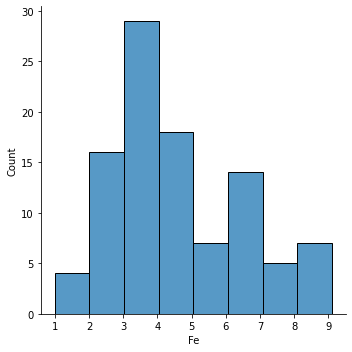

<Figure size 1224x72 with 0 Axes>

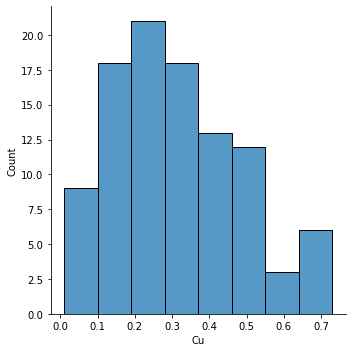

<Figure size 1224x72 with 0 Axes>

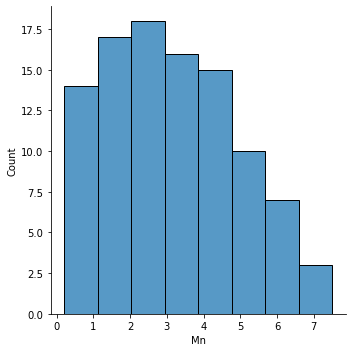

<Figure size 1224x72 with 0 Axes>

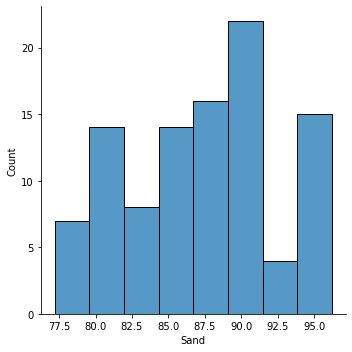

<Figure size 1224x72 with 0 Axes>

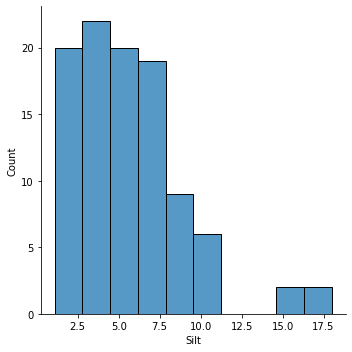

<Figure size 1224x72 with 0 Axes>

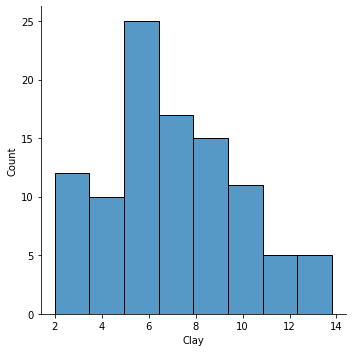

<Figure size 1224x72 with 0 Axes>

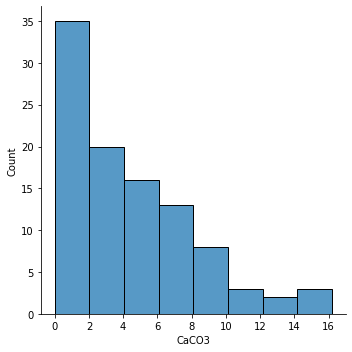

<Figure size 1224x72 with 0 Axes>

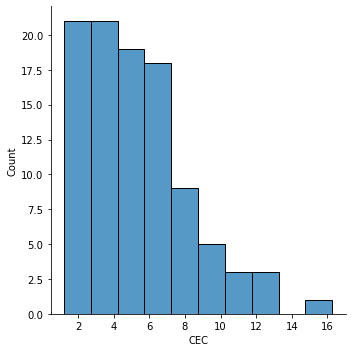

In [ ]:
#Printing displot for each numerical column present in the data set
df1=df.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.displot(data=df1, x=column)
plt.show()

In [ ]:
df1

,pH,EC,OC,OM,N,P,K,Zn,Fe,Cu,Mn,Sand,Silt,Clay,CaCO3,CEC
0,7.74,0.40,0.01,0.01,75,20.0,279,0.48,6.4,0.21,4.7,84.3,6.8,8.9,6.72,7.81
1,9.02,0.31,0.02,0.03,85,15.7,247,0.27,6.4,0.16,5.6,90.4,3.9,5.7,4.61,7.19
2,7.80,0.17,0.02,0.03,77,35.6,265,0.46,6.2,0.51,6.1,84.5,6.9,8.6,1.53,12.32
3,8.36,0.02,0.03,0.05,106,6.4,127,0.50,3.1,0.28,2.3,93.9,1.7,4.4,0.00,1.60
4,8.36,1.08,0.03,0.05,96,10.5,96,0.31,3.2,0.23,4.1,91.5,4.1,4.4,9.08,7.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9.21,0.14,0.62,1.06,278,9.8,165,0.18,8.6,0.57,5.8,88.2,2.4,9.4,4.23,8.81
96,7.50,0.22,0.68,1.17,272,9.5,139,0.72,2.6,0.12,1.8,95.4,1.4,3.2,0.00,5.58
97,8.26,0.25,0.71,1.22,277,11.5,264,0.36,7.6,0.07,0.8,90.7,2.5,6.8,3.85,7.26
98,8.12,0.14,0.73,1.25,265,4.6,283,0.38,3.7,0.18,0.8,86.0,6.7,7.3,0.00,3.10


c:\program files\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


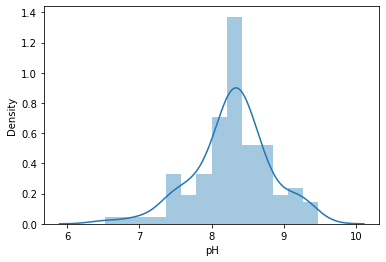

In [ ]:
#  distribution plot for pH column
sns.distplot(df1['pH'])

In [22]:
#  distribution plot for EC column
sns.distplot(df1['EC'])

NameError: name 'df1' is not defined

In [23]:
#  distribution plot for OC column
sns.distplot(df1['OC'])

NameError: name 'df1' is not defined

In [24]:
#  distribution plot for OM column
sns.distplot(df1['OM'])

NameError: name 'df1' is not defined

c:\program files\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


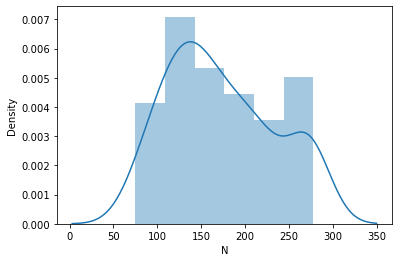

In [ ]:
#  distribution plot for N column
sns.distplot(df1['N'])

In [25]:
#  distribution plot for P column
sns.distplot(df1['P'])

NameError: name 'df1' is not defined

In [26]:
#  distribution plot for K column
sns.distplot(df1['K'])

NameError: name 'df1' is not defined

c:\program files\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


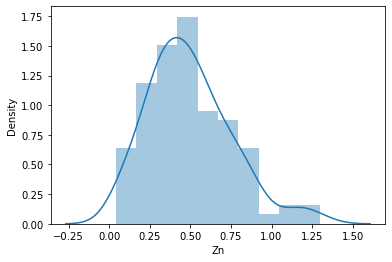

In [ ]:
#  distribution plot for Zn column
sns.distplot(df1['Zn'])

In [27]:
#  distribution plot for Fe column
sns.distplot(df1['Fe'])

NameError: name 'df1' is not defined

c:\program files\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


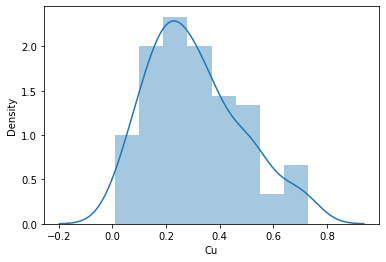

In [ ]:
#  distribution plot for Cu column
sns.distplot(df1['Cu'])

In [28]:
#  distribution plot for Sand column
sns.distplot(df1['Sand'])

NameError: name 'df1' is not defined

In [29]:
#  distribution plot for Silt column
sns.distplot(df1['Silt'])

NameError: name 'df1' is not defined

c:\program files\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


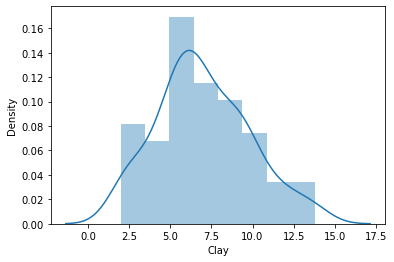

In [ ]:
#  distribution plot for Clay column
sns.distplot(df1['Clay'])

In [30]:
#  distribution plot for CaCo3 column
sns.distplot(df1['CaCO3'])

NameError: name 'df1' is not defined

In [31]:
#  distribution plot for CEC column
sns.distplot(df1['CEC'])

NameError: name 'df1' is not defined

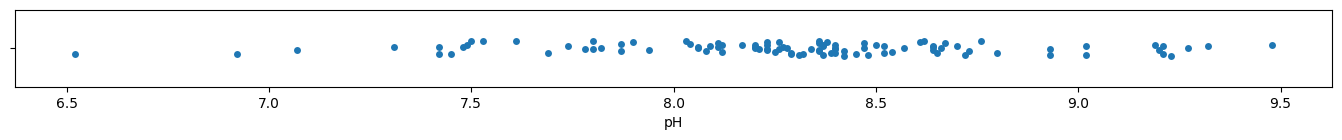

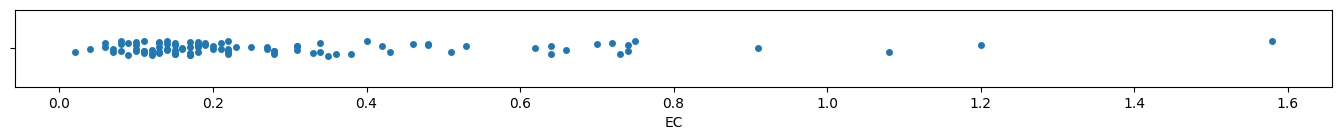

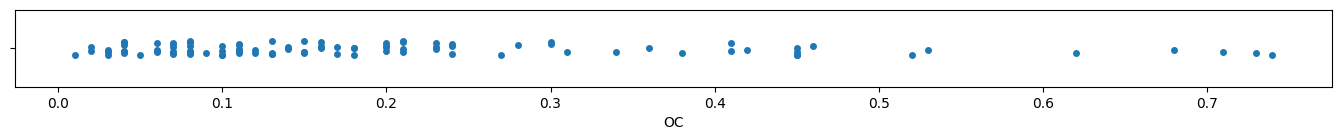

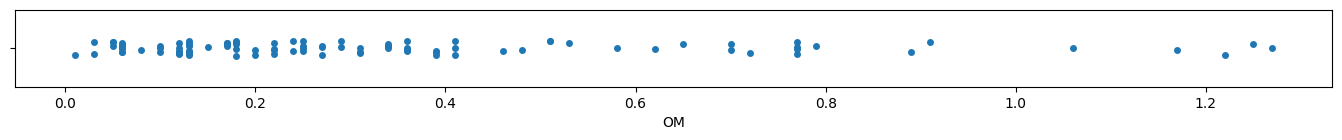

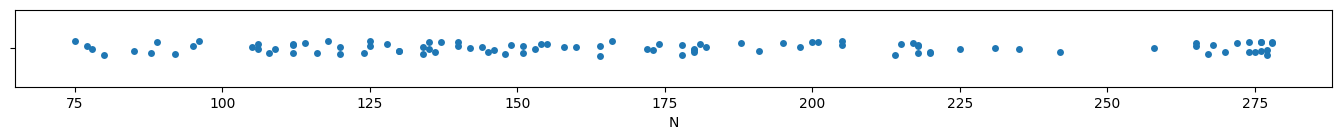

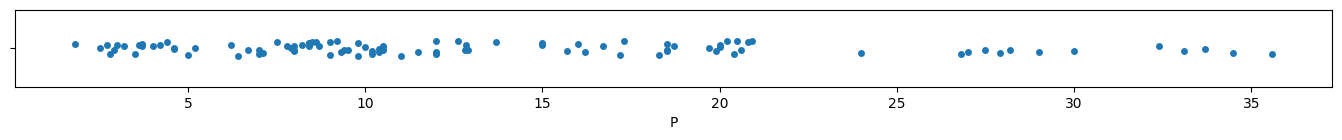

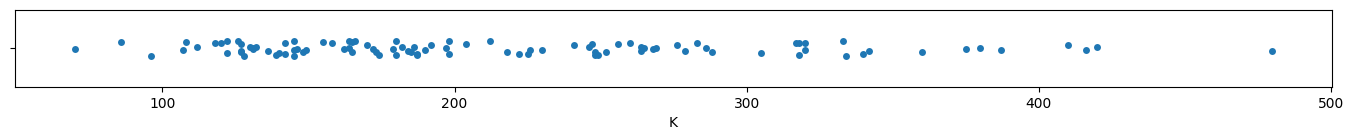

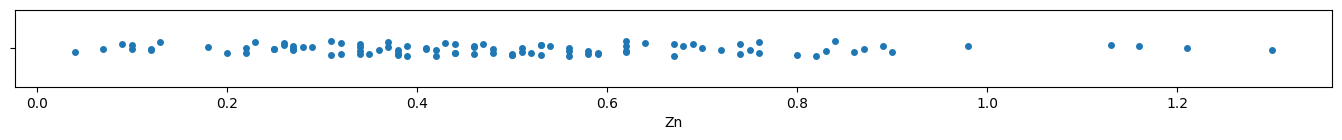

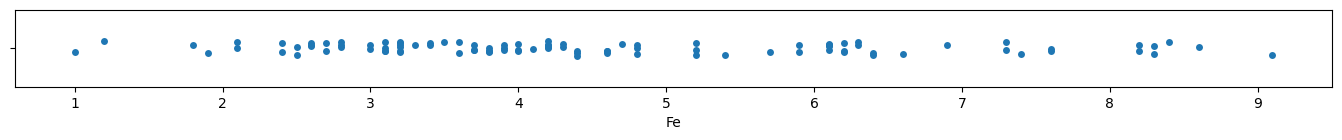

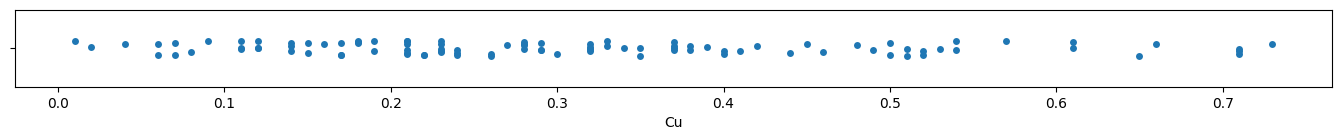

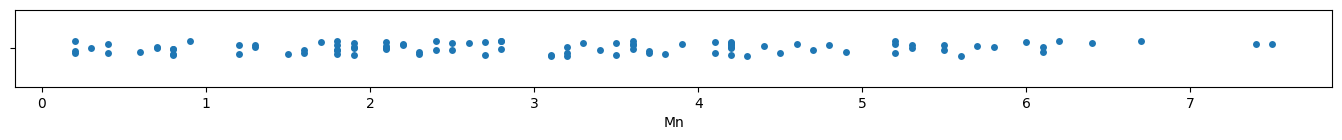

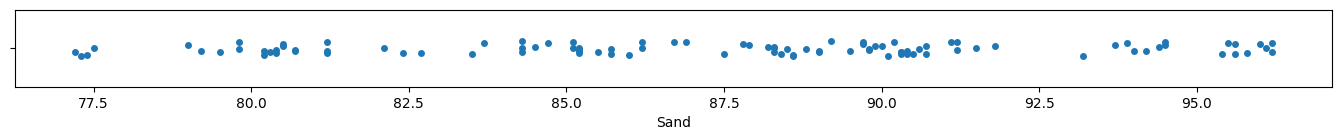

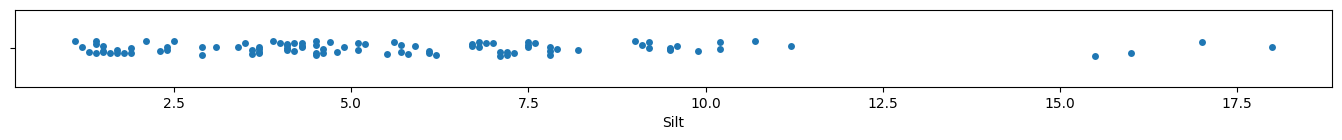

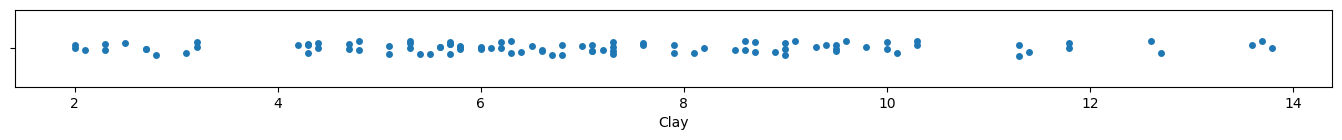

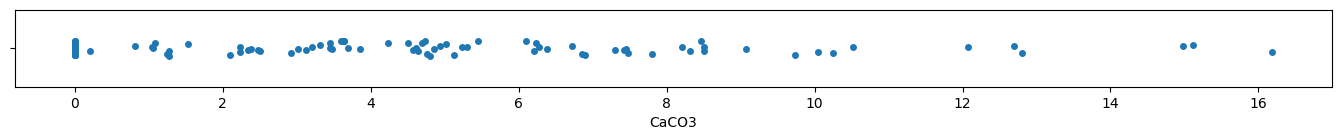

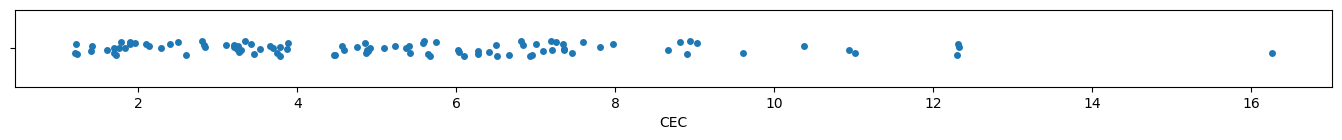

In [32]:
#Printing strip plot for each numerical column present in the data set
df1=df.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.stripplot(data=df1, x=column)
plt.show()

array([[<Axes: title={'center': 'pH'}>, <Axes: title={'center': 'EC'}>,
        <Axes: title={'center': 'OC'}>, <Axes: title={'center': 'OM'}>],
       [<Axes: title={'center': 'N'}>, <Axes: title={'center': 'P'}>,
        <Axes: title={'center': 'K'}>, <Axes: title={'center': 'Zn'}>],
       [<Axes: title={'center': 'Fe'}>, <Axes: title={'center': 'Cu'}>,
        <Axes: title={'center': 'Mn'}>, <Axes: title={'center': 'Sand'}>],
       [<Axes: title={'center': 'Silt'}>,
        <Axes: title={'center': 'Clay'}>,
        <Axes: title={'center': 'CaCO3'}>,
        <Axes: title={'center': 'CEC'}>]], dtype=object)

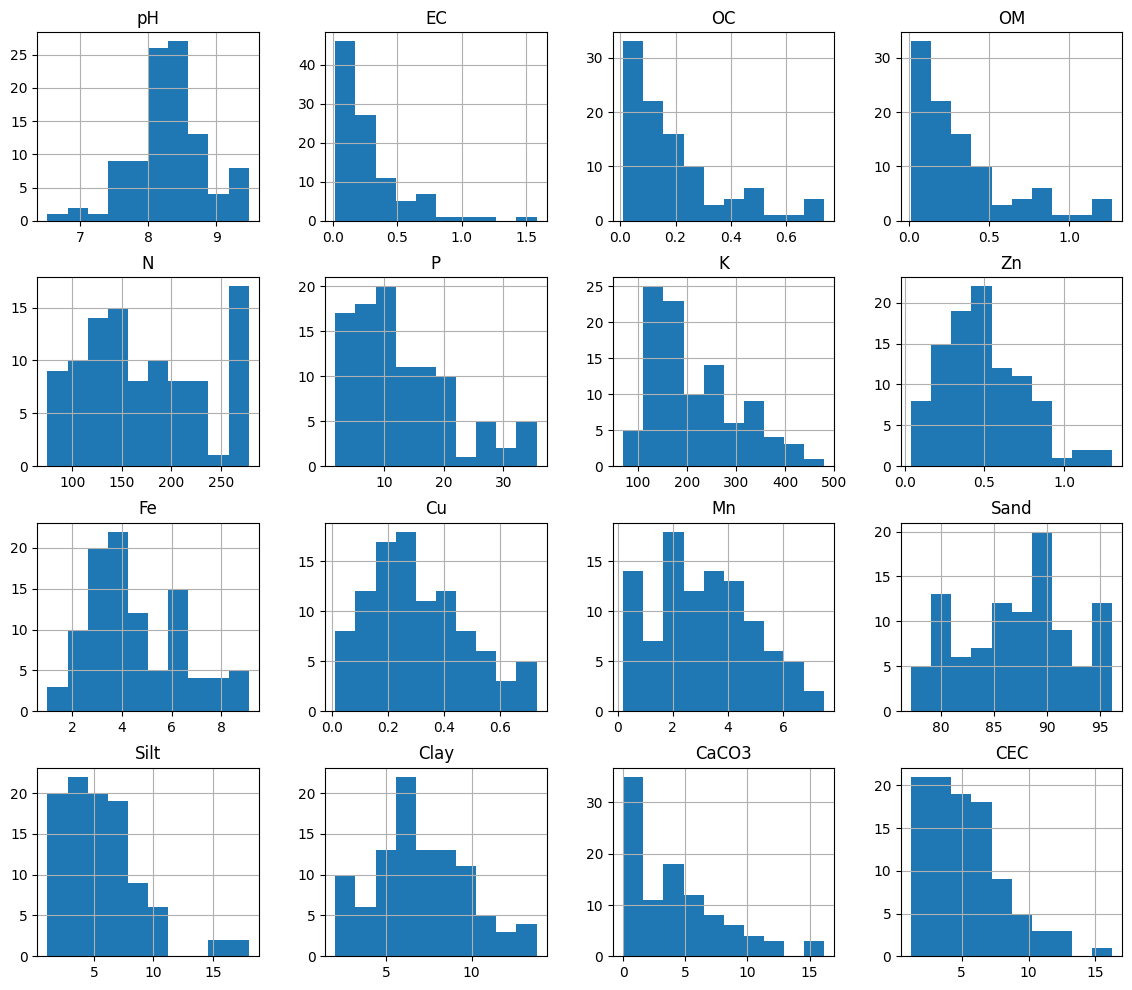

In [33]:
df1.hist(figsize = (14,12)) #shows graphically the value counts of each column 

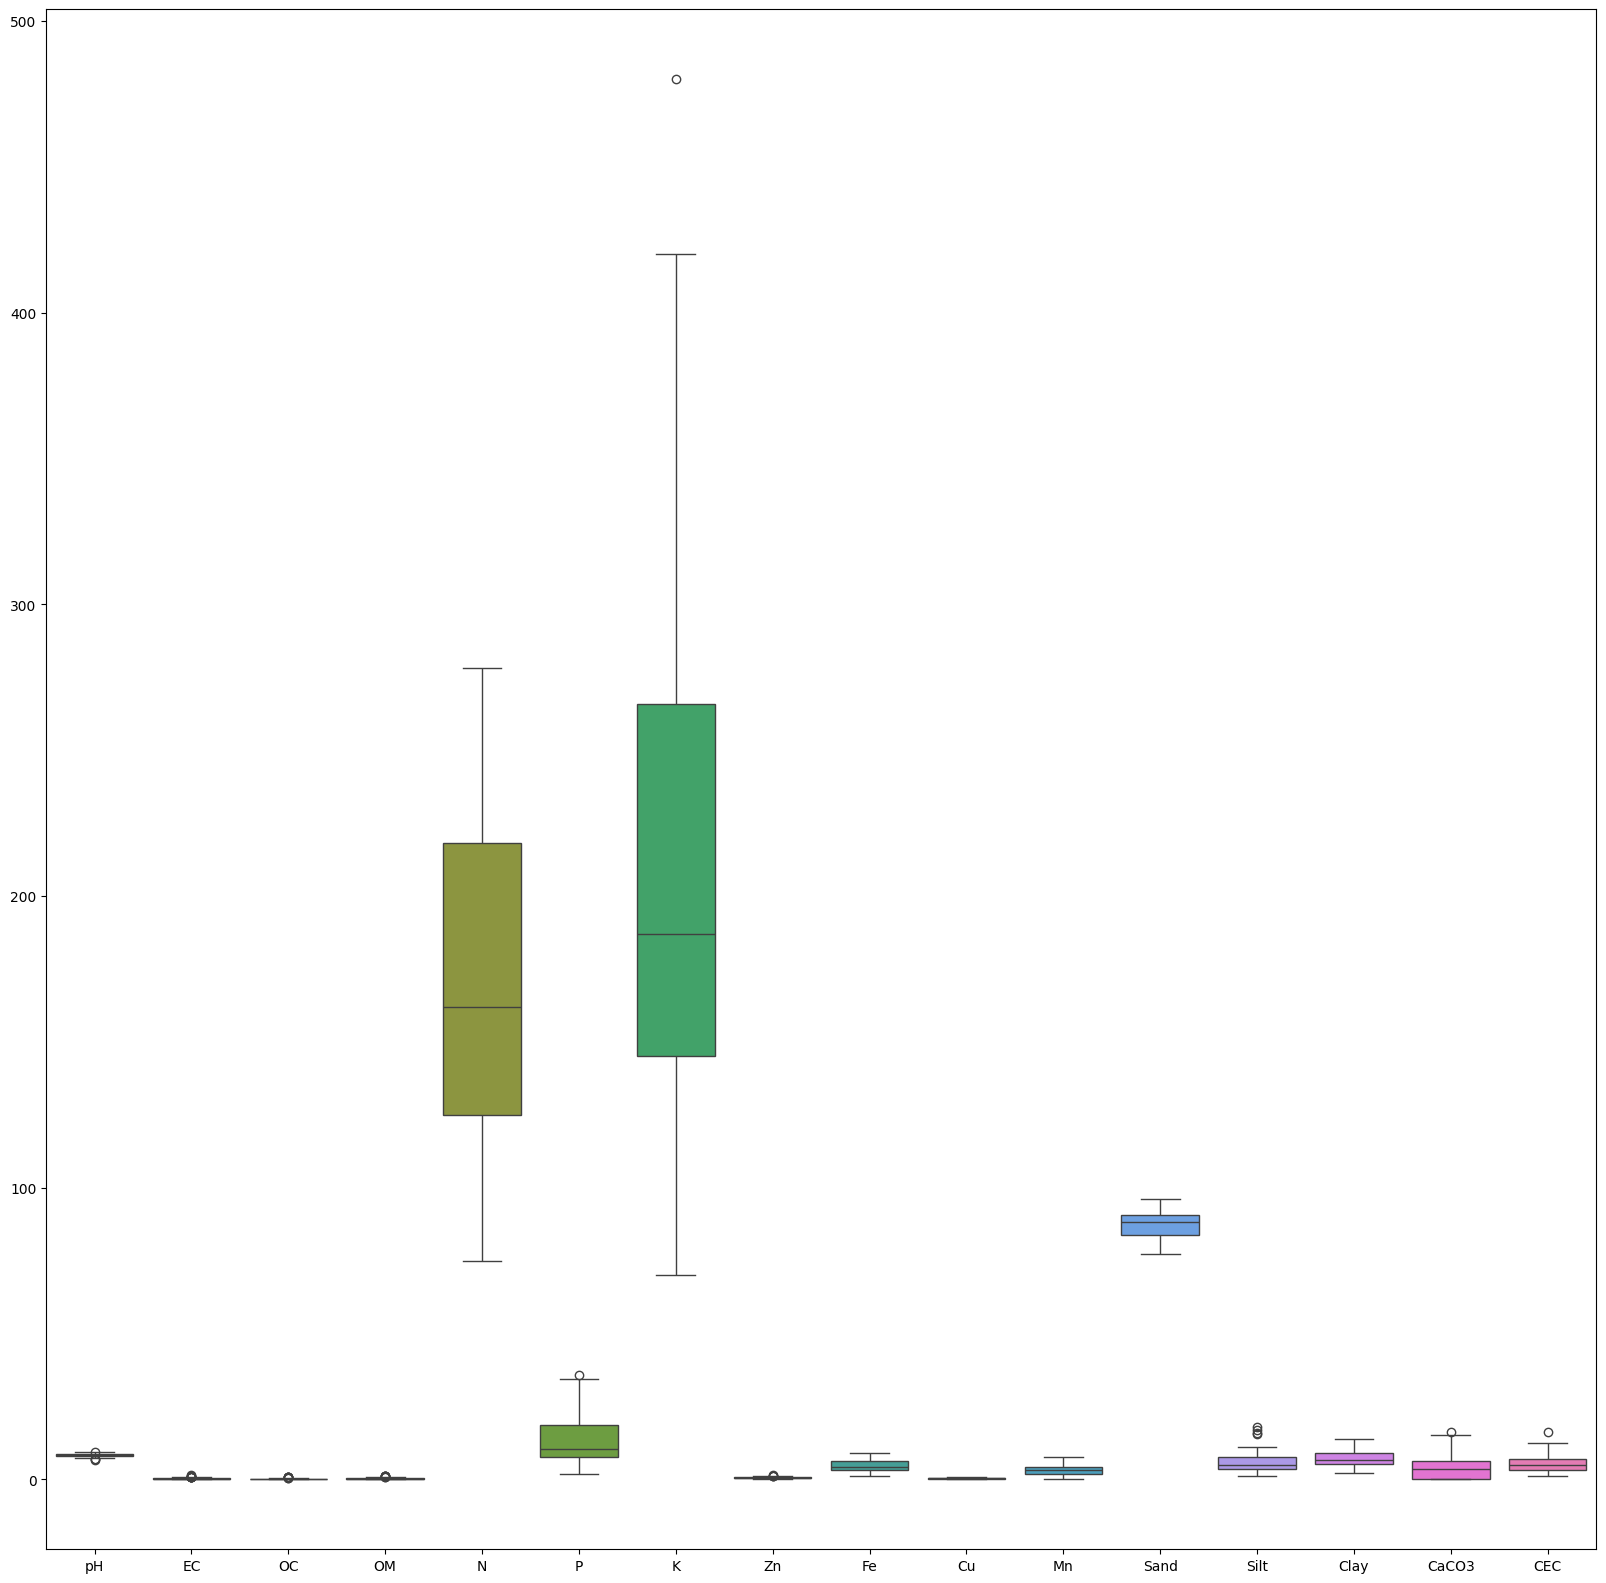

In [34]:
#box plot
plt.figure(figsize=(20,20))
ax = sns.boxplot(data=df1)

In [35]:
# configure seaborn
sns.set(rc={'figure.figsize':(12, 6)})
sns.set_theme()
sns.set_style("dark")
plt.show()

Text(0.5, 1.0, 'Training Example Frame')

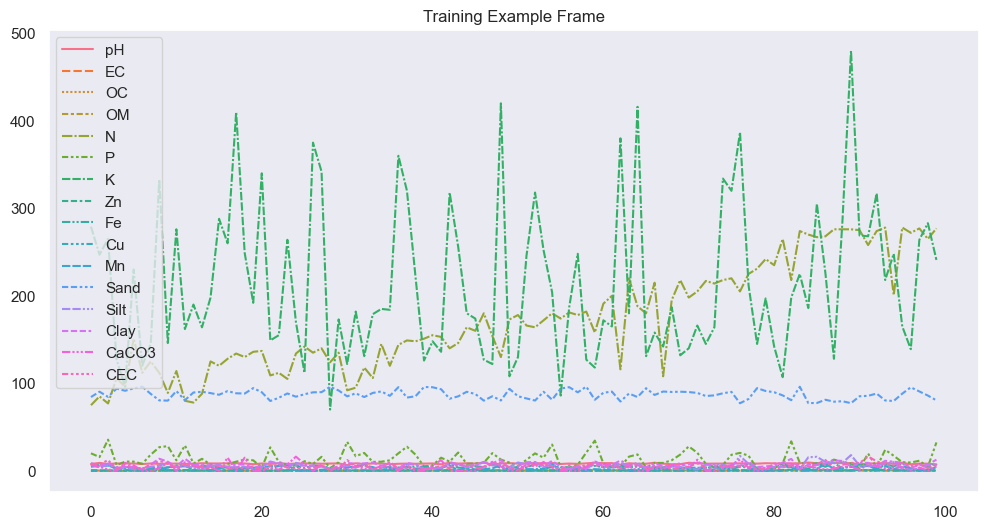

In [36]:
sns.lineplot(data=df1).set_title('Training Example Frame')

# $Data Preprocessing$

In [37]:
#checking for the null values in the dataset
df.isnull().sum()

pH        0
EC        0
OC        0
OM        0
N         0
P         0
K         0
Zn        0
Fe        0
Cu        0
Mn        0
Sand      0
Silt      0
Clay      0
CaCO3     0
CEC       0
Output    0
dtype: int64

In [38]:
df.shape

(100, 17)

In [39]:
df

,pH,EC,OC,OM,N,P,K,Zn,Fe,Cu,Mn,Sand,Silt,Clay,CaCO3,CEC,Output
0,7.74,0.40,0.01,0.01,75,20.0,279,0.48,6.4,0.21,4.7,84.3,6.8,8.9,6.72,7.81,Fertile
1,9.02,0.31,0.02,0.03,85,15.7,247,0.27,6.4,0.16,5.6,90.4,3.9,5.7,4.61,7.19,Fertile
2,7.80,0.17,0.02,0.03,77,35.6,265,0.46,6.2,0.51,6.1,84.5,6.9,8.6,1.53,12.32,Fertile
3,8.36,0.02,0.03,0.05,106,6.4,127,0.50,3.1,0.28,2.3,93.9,1.7,4.4,0.00,1.60,Non Fertile
4,8.36,1.08,0.03,0.05,96,10.5,96,0.31,3.2,0.23,4.1,91.5,4.1,4.4,9.08,7.21,Non Fertile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9.21,0.14,0.62,1.06,278,9.8,165,0.18,8.6,0.57,5.8,88.2,2.4,9.4,4.23,8.81,Fertile
96,7.50,0.22,0.68,1.17,272,9.5,139,0.72,2.6,0.12,1.8,95.4,1.4,3.2,0.00,5.58,Non Fertile
97,8.26,0.25,0.71,1.22,277,11.5,264,0.36,7.6,0.07,0.8,90.7,2.5,6.8,3.85,7.26,Fertile
98,8.12,0.14,0.73,1.25,265,4.6,283,0.38,3.7,0.18,0.8,86.0,6.7,7.3,0.00,3.10,Non Fertile


# Replacing the target values categorical into numerica 

In [40]:
df.replace({'Fertile':0,'Non Fertile':1})

,pH,EC,OC,OM,N,P,K,Zn,Fe,Cu,Mn,Sand,Silt,Clay,CaCO3,CEC,Output
0,7.74,0.40,0.01,0.01,75,20.0,279,0.48,6.4,0.21,4.7,84.3,6.8,8.9,6.72,7.81,0
1,9.02,0.31,0.02,0.03,85,15.7,247,0.27,6.4,0.16,5.6,90.4,3.9,5.7,4.61,7.19,0
2,7.80,0.17,0.02,0.03,77,35.6,265,0.46,6.2,0.51,6.1,84.5,6.9,8.6,1.53,12.32,0
3,8.36,0.02,0.03,0.05,106,6.4,127,0.50,3.1,0.28,2.3,93.9,1.7,4.4,0.00,1.60,1
4,8.36,1.08,0.03,0.05,96,10.5,96,0.31,3.2,0.23,4.1,91.5,4.1,4.4,9.08,7.21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9.21,0.14,0.62,1.06,278,9.8,165,0.18,8.6,0.57,5.8,88.2,2.4,9.4,4.23,8.81,0
96,7.50,0.22,0.68,1.17,272,9.5,139,0.72,2.6,0.12,1.8,95.4,1.4,3.2,0.00,5.58,1
97,8.26,0.25,0.71,1.22,277,11.5,264,0.36,7.6,0.07,0.8,90.7,2.5,6.8,3.85,7.26,0
98,8.12,0.14,0.73,1.25,265,4.6,283,0.38,3.7,0.18,0.8,86.0,6.7,7.3,0.00,3.10,1


In [41]:
le = LabelEncoder()
df['Output']=le.fit_transform(df['Output'])

In [42]:
df.isnull().sum()

pH        0
EC        0
OC        0
OM        0
N         0
P         0
K         0
Zn        0
Fe        0
Cu        0
Mn        0
Sand      0
Silt      0
Clay      0
CaCO3     0
CEC       0
Output    0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pH      100 non-null    float64
 1   EC      100 non-null    float64
 2   OC      100 non-null    float64
 3   OM      100 non-null    float64
 4   N       100 non-null    int64  
 5   P       100 non-null    float64
 6   K       100 non-null    int64  
 7   Zn      100 non-null    float64
 8   Fe      100 non-null    float64
 9   Cu      100 non-null    float64
 10  Mn      100 non-null    float64
 11  Sand    100 non-null    float64
 12  Silt    100 non-null    float64
 13  Clay    100 non-null    float64
 14  CaCO3   100 non-null    float64
 15  CEC     100 non-null    float64
 16  Output  100 non-null    int32  
dtypes: float64(14), int32(1), int64(2)
memory usage: 13.0 KB


# $Feature Selection$

## Let's plot the correlation plot to select the features 

<Axes: >

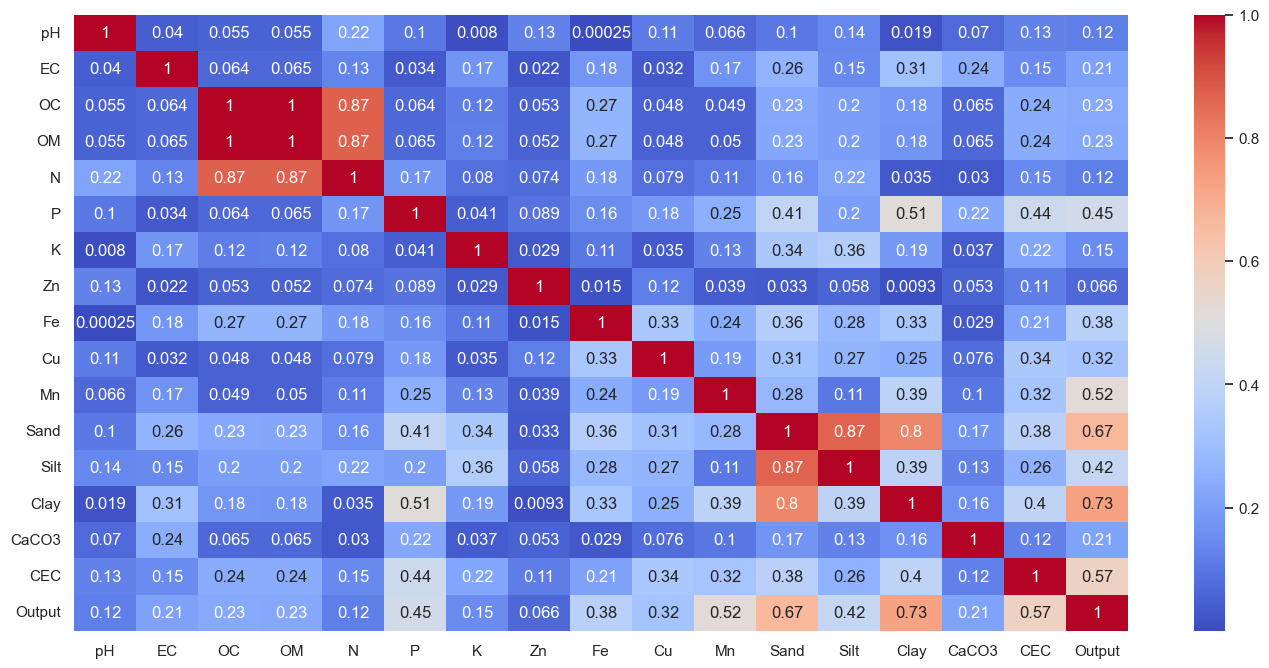

In [44]:
## plot the Correlation matrix
plt.figure(figsize=(17,8))
correlation=df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [45]:
corr = df.corr()
corr

,pH,EC,OC,OM,N,P,K,Zn,Fe,Cu,Mn,Sand,Silt,Clay,CaCO3,CEC,Output
pH,1.000000,-0.039785,0.054628,0.054636,0.215123,-0.104457,0.008033,-0.125287,0.000248,0.111895,-0.065682,-0.102130,0.139819,0.018530,0.069781,-0.127546,-0.119546
EC,-0.039785,1.000000,-0.064467,-0.065148,-0.131516,0.034344,0.174792,0.022255,0.177803,0.031690,0.170074,-0.264067,0.148132,0.310270,0.244580,0.151634,-0.210259
OC,0.054628,-0.064467,1.000000,0.999953,0.874600,-0.063918,0.117024,0.052893,0.268363,0.048208,-0.049230,-0.226911,0.200327,0.177017,-0.064737,0.242274,-0.231089
OM,0.054636,-0.065148,0.999953,1.000000,0.874989,-0.065122,0.117469,0.052041,0.267066,0.047907,-0.049630,-0.225636,0.199655,0.175467,-0.064763,0.241222,-0.230452
N,0.215123,-0.131516,0.874600,0.874989,1.000000,-0.174320,0.080173,0.074115,0.184906,0.079142,-0.107176,-0.161278,0.216251,0.035362,-0.030218,0.146390,-0.120688
P,-0.104457,0.034344,-0.063918,-0.065122,-0.174320,1.000000,0.040908,0.088894,0.155752,0.179923,0.253839,-0.405029,0.200875,0.508103,0.223148,0.440307,-0.453407
K,0.008033,0.174792,0.117024,0.117469,0.080173,0.040908,1.000000,0.029318,0.105048,-0.035262,0.127351,-0.336955,0.360472,0.185336,-0.037375,0.220634,-0.151044
Zn,-0.125287,0.022255,0.052893,0.052041,0.074115,0.088894,0.029318,1.000000,-0.015407,0.117413,0.038849,0.033104,-0.057720,0.009284,0.053424,0.114444,-0.066374
Fe,0.000248,0.177803,0.268363,0.267066,0.184906,0.155752,0.105048,-0.015407,1.000000,0.330394,0.239800,-0.364939,0.281886,0.334471,0.029093,0.209504,-0.375430
Cu,0.111895,0.031690,0.048208,0.047907,0.079142,0.179923,-0.035262,0.117413,0.330394,1.000000,0.191066,-0.311347,0.269432,0.249503,0.076123,0.337317,-0.319763


In [46]:
# corr.to_csv('correlation.csv')

In [47]:
# Create correlation matrix
corr_matrix = df.corr().abs()
corr_matrix

,pH,EC,OC,OM,N,P,K,Zn,Fe,Cu,Mn,Sand,Silt,Clay,CaCO3,CEC,Output
pH,1.000000,0.039785,0.054628,0.054636,0.215123,0.104457,0.008033,0.125287,0.000248,0.111895,0.065682,0.102130,0.139819,0.018530,0.069781,0.127546,0.119546
EC,0.039785,1.000000,0.064467,0.065148,0.131516,0.034344,0.174792,0.022255,0.177803,0.031690,0.170074,0.264067,0.148132,0.310270,0.244580,0.151634,0.210259
OC,0.054628,0.064467,1.000000,0.999953,0.874600,0.063918,0.117024,0.052893,0.268363,0.048208,0.049230,0.226911,0.200327,0.177017,0.064737,0.242274,0.231089
OM,0.054636,0.065148,0.999953,1.000000,0.874989,0.065122,0.117469,0.052041,0.267066,0.047907,0.049630,0.225636,0.199655,0.175467,0.064763,0.241222,0.230452
N,0.215123,0.131516,0.874600,0.874989,1.000000,0.174320,0.080173,0.074115,0.184906,0.079142,0.107176,0.161278,0.216251,0.035362,0.030218,0.146390,0.120688
P,0.104457,0.034344,0.063918,0.065122,0.174320,1.000000,0.040908,0.088894,0.155752,0.179923,0.253839,0.405029,0.200875,0.508103,0.223148,0.440307,0.453407
K,0.008033,0.174792,0.117024,0.117469,0.080173,0.040908,1.000000,0.029318,0.105048,0.035262,0.127351,0.336955,0.360472,0.185336,0.037375,0.220634,0.151044
Zn,0.125287,0.022255,0.052893,0.052041,0.074115,0.088894,0.029318,1.000000,0.015407,0.117413,0.038849,0.033104,0.057720,0.009284,0.053424,0.114444,0.066374
Fe,0.000248,0.177803,0.268363,0.267066,0.184906,0.155752,0.105048,0.015407,1.000000,0.330394,0.239800,0.364939,0.281886,0.334471,0.029093,0.209504,0.375430
Cu,0.111895,0.031690,0.048208,0.047907,0.079142,0.179923,0.035262,0.117413,0.330394,1.000000,0.191066,0.311347,0.269432,0.249503,0.076123,0.337317,0.319763


# Splitting Data Into x and y

In [50]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [51]:
x

,pH,EC,OC,OM,N,P,K,Zn,Fe,Cu,Mn,Sand,Silt,Clay,CaCO3,CEC
0,7.74,0.40,0.01,0.01,75,20.0,279,0.48,6.4,0.21,4.7,84.3,6.8,8.9,6.72,7.81
1,9.02,0.31,0.02,0.03,85,15.7,247,0.27,6.4,0.16,5.6,90.4,3.9,5.7,4.61,7.19
2,7.80,0.17,0.02,0.03,77,35.6,265,0.46,6.2,0.51,6.1,84.5,6.9,8.6,1.53,12.32
3,8.36,0.02,0.03,0.05,106,6.4,127,0.50,3.1,0.28,2.3,93.9,1.7,4.4,0.00,1.60
4,8.36,1.08,0.03,0.05,96,10.5,96,0.31,3.2,0.23,4.1,91.5,4.1,4.4,9.08,7.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9.21,0.14,0.62,1.06,278,9.8,165,0.18,8.6,0.57,5.8,88.2,2.4,9.4,4.23,8.81
96,7.50,0.22,0.68,1.17,272,9.5,139,0.72,2.6,0.12,1.8,95.4,1.4,3.2,0.00,5.58
97,8.26,0.25,0.71,1.22,277,11.5,264,0.36,7.6,0.07,0.8,90.7,2.5,6.8,3.85,7.26
98,8.12,0.14,0.73,1.25,265,4.6,283,0.38,3.7,0.18,0.8,86.0,6.7,7.3,0.00,3.10


In [52]:
y

0     0
1     0
2     0
3     1
4     1
     ..
95    0
96    1
97    0
98    1
99    0
Name: Output, Length: 100, dtype: int32

In [53]:
x.shape

(100, 16)

In [54]:
y.value_counts()

Output
0    50
1    50
Name: count, dtype: int64

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=0.3,random_state=72)

# $Model Building$

#  Implementing with the RandomForest

In [56]:
rf_Classifier = RandomForestClassifier(ccp_alpha=0.17)

rf_Classifier.fit(x_train,y_train)

C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


RandomForestClassifier(ccp_alpha=0.17)

In [57]:
y_pred = rf_Classifier.predict(x_test)

C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [58]:
acc_rf = accuracy_score(y_pred,y_test)
acc_rf*100

90.0

In [59]:
#Printing the Classification report for RandomForestClassifier model
print('The classificatin report for RandomForestClassifier as follows:')
report  = classification_report(y_test,y_pred)
print(report)

The classificatin report for RandomForestClassifier as follows:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.83      1.00      0.91        15

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30



C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0420\AppData\Roaming

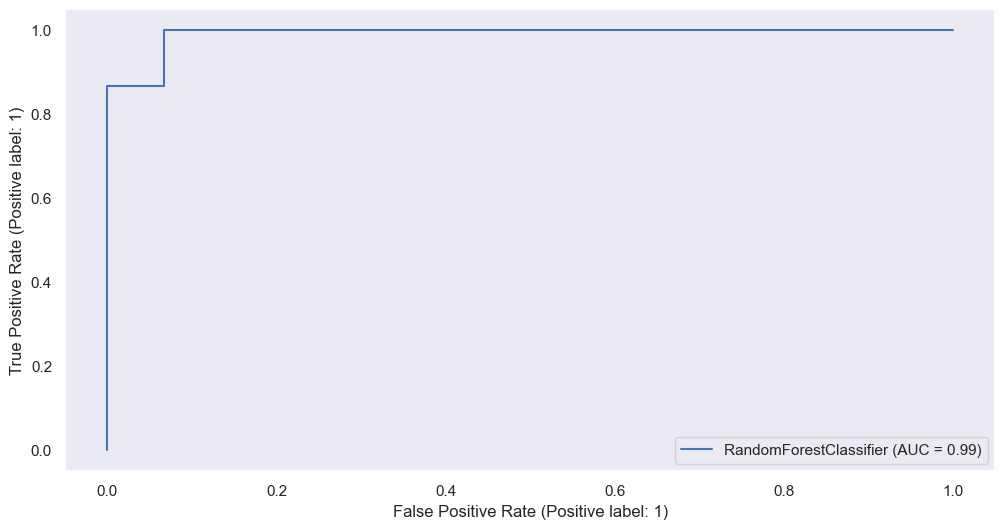

In [60]:
disp = plot_roc_curve(rf_Classifier, x_test, y_test)

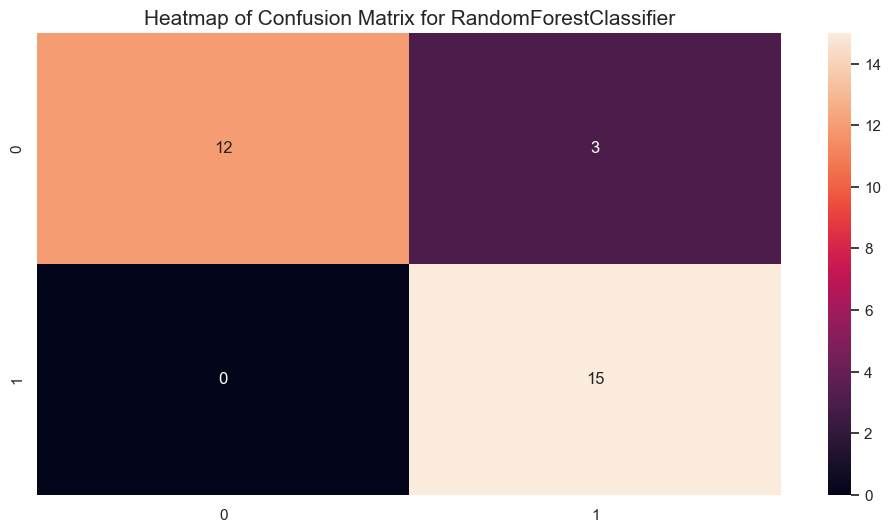

In [61]:
#confustion metrix
cm = confusion_matrix(y_test, y_pred)
plt.title('Heatmap of Confusion Matrix for RandomForestClassifier', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

# Implementing with the LogisticRegression

In [62]:
lr_Classifier = LogisticRegression()
lr_Classifier.fit(x_train,y_train)

C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):

LogisticRegression()

In [63]:
y_pred = lr_Classifier.predict(x_test)

C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [64]:
acc_lr = accuracy_score(y_pred,y_test)
acc_lr*100

90.0

In [65]:
#Printing the Classification report for LogisticRegression model
print('The classificatin report for LogisticRegression as follows:')
report  = classification_report(y_test,y_pred)
print(report)

The classificatin report for LogisticRegression as follows:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.88      0.93      0.90        15

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0420\AppData\Roaming

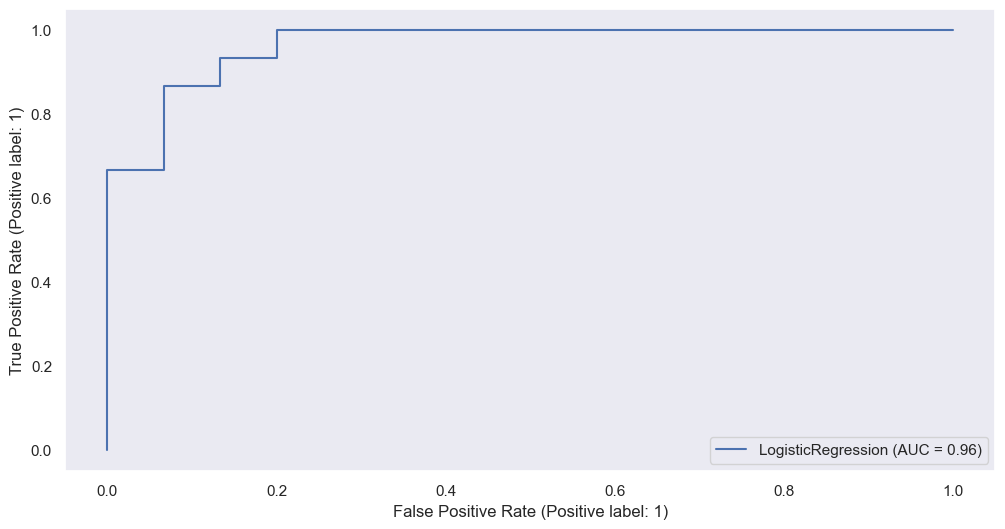

In [66]:
disp = plot_roc_curve(lr_Classifier, x_test, y_test)

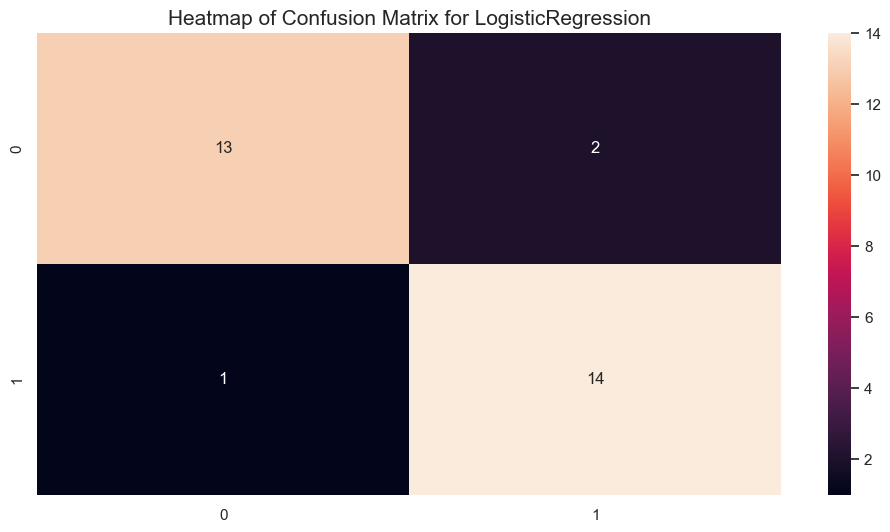

In [67]:
#confustion metrix
cm = confusion_matrix(y_test, y_pred)
plt.title('Heatmap of Confusion Matrix for LogisticRegression', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

# Implementing with the MLP

In [68]:
mlp_Classifier = MLPClassifier()
mlp_Classifier.fit(x_train,y_train)

C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer:

MLPClassifier()

In [69]:
y_pred = mlp_Classifier.predict(x_test)

C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [70]:
acc_mlp = accuracy_score(y_test,y_pred)
acc_mlp*100

83.33333333333334

In [71]:
#Printing the Classification report for MLPClassifier model
print('The classificatin report for MLPClassifier as follows:')
report  = classification_report(y_test,y_pred)
print(report)

The classificatin report for MLPClassifier as follows:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        15
           1       0.92      0.73      0.81        15

    accuracy                           0.83        30
   macro avg       0.85      0.83      0.83        30
weighted avg       0.85      0.83      0.83        30



C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0420\AppData\Roaming

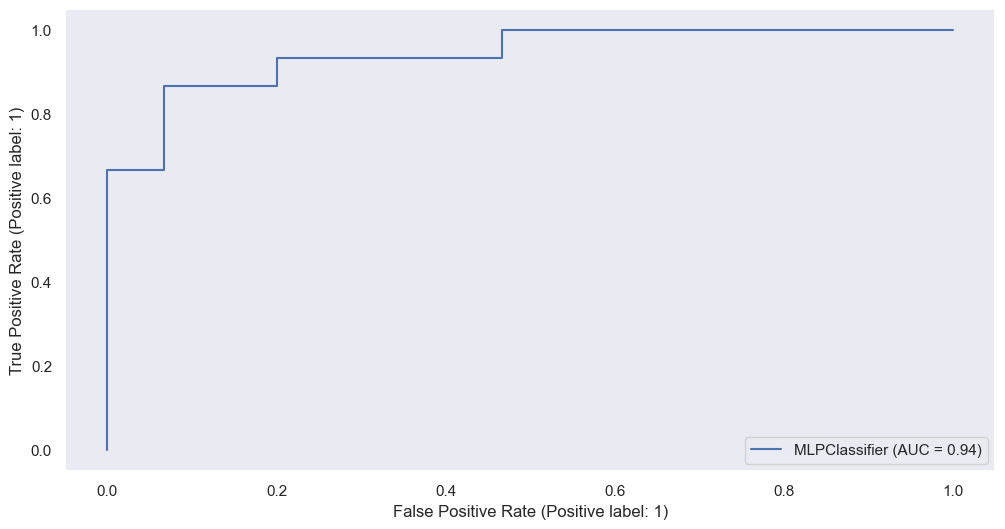

In [72]:
disp = plot_roc_curve(mlp_Classifier, x_test, y_test)

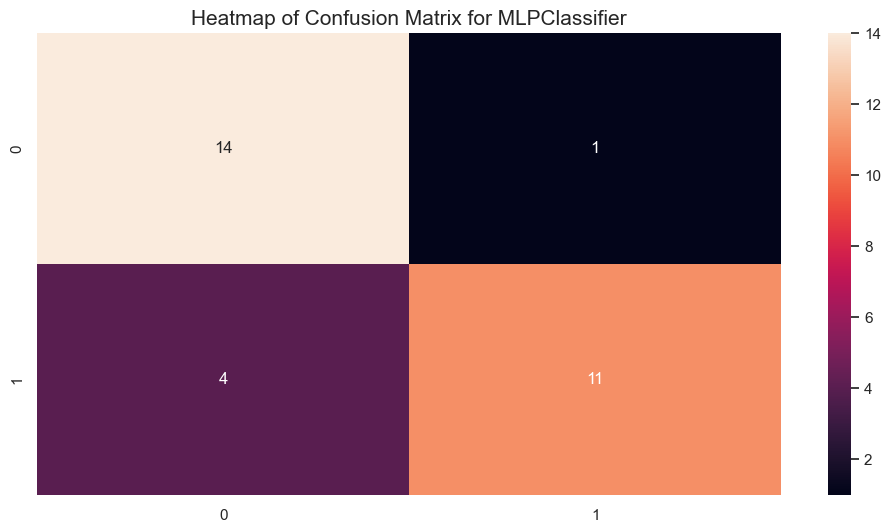

In [73]:
#confustion metrix
cm = confusion_matrix(y_test, y_pred)
plt.title('Heatmap of Confusion Matrix for MLPClassifier', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

# Implementing with the SVM

In [74]:
svm_Classifier = SVC()
svm_Classifier.fit(x_train,y_train)

C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


SVC()

In [75]:
y_pred = svm_Classifier.predict(x_test)

C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [76]:
acc_svm = accuracy_score(y_pred,y_test)
acc_svm*100

53.333333333333336

In [77]:
#Printing the Classification report for SVM model
print('The classificatin report for SVM as follows:')
report  = classification_report(y_test,y_pred)
print(report)

The classificatin report for SVM as follows:
              precision    recall  f1-score   support

           0       0.53      0.60      0.56        15
           1       0.54      0.47      0.50        15

    accuracy                           0.53        30
   macro avg       0.53      0.53      0.53        30
weighted avg       0.53      0.53      0.53        30



C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0420\AppData\Roaming

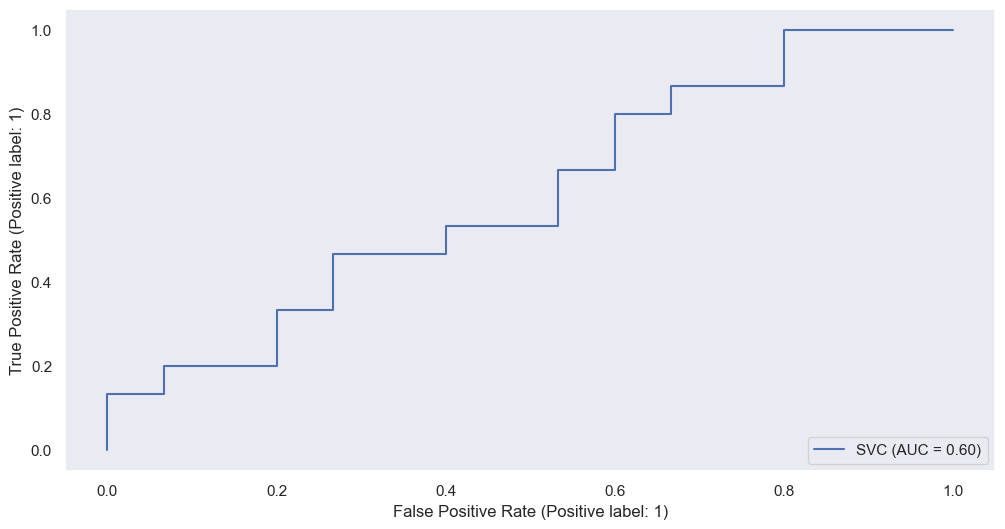

In [78]:
disp = plot_roc_curve(svm_Classifier, x_test, y_test)

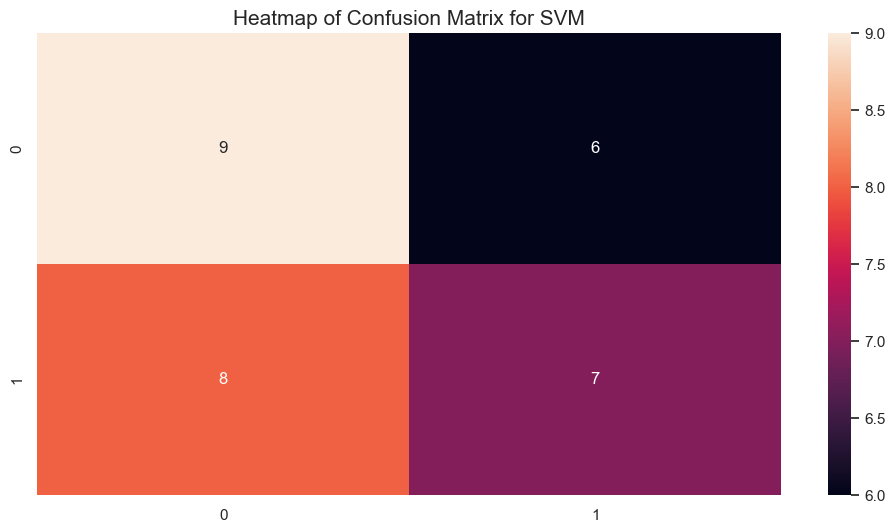

In [79]:
#confustion metrix
cm = confusion_matrix(y_test, y_pred)
plt.title('Heatmap of Confusion Matrix for SVM', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

# Mplementing with the GaussianNB

In [80]:
nb_Classifier = GaussianNB()
nb_Classifier.fit(x_train,y_train)

C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


GaussianNB()

In [81]:
y_pred = nb_Classifier.predict(x_test)

C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [82]:
acc_nb = accuracy_score(y_pred,y_test)
acc_nb*100

86.66666666666667

In [83]:
#Printing the Classification report for GaussianNB model
print('The classificatin report for GaussianNB as follows:')
report  = classification_report(y_test,y_pred)
print(report)

The classificatin report for GaussianNB as follows:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.87      0.87      0.87        15

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30



C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\0420\AppData\Roaming

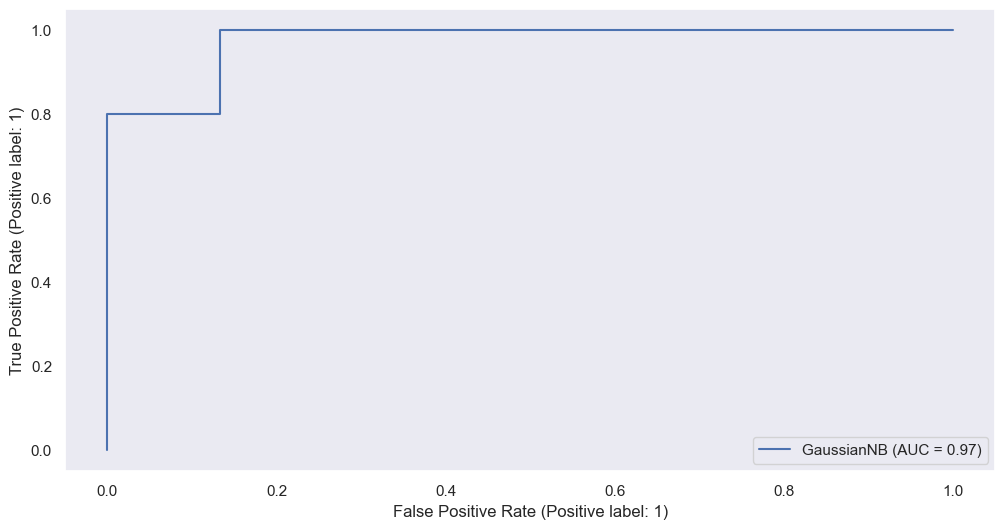

In [84]:
disp = plot_roc_curve(nb_Classifier, x_test, y_test)

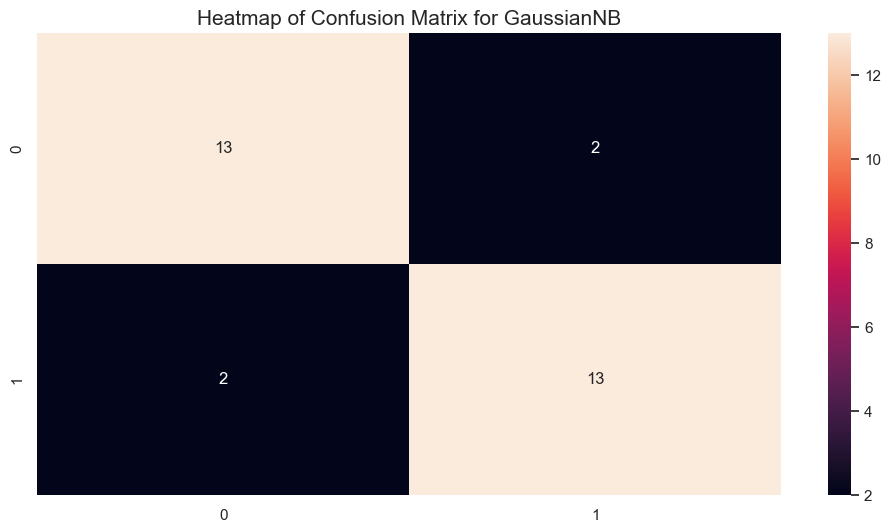

In [85]:
#confustion metrix
cm = confusion_matrix(y_test, y_pred)
plt.title('Heatmap of Confusion Matrix for GaussianNB', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pH      100 non-null    float64
 1   EC      100 non-null    float64
 2   OC      100 non-null    float64
 3   OM      100 non-null    float64
 4   N       100 non-null    int64  
 5   P       100 non-null    float64
 6   K       100 non-null    int64  
 7   Zn      100 non-null    float64
 8   Fe      100 non-null    float64
 9   Cu      100 non-null    float64
 10  Mn      100 non-null    float64
 11  Sand    100 non-null    float64
 12  Silt    100 non-null    float64
 13  Clay    100 non-null    float64
 14  CaCO3   100 non-null    float64
 15  CEC     100 non-null    float64
 16  Output  100 non-null    int32  
dtypes: float64(14), int32(1), int64(2)
memory usage: 13.0 KB


# Mplementing with the ANN

In [87]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='softmax'))

In [88]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [89]:
model.fit(x_train, y_train, batch_size=500, epochs=10,validation_data=(x_test, y_test))

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 17.2457 - accuracy: 0.5000 - val_loss: 15.7587 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 87ms/step - loss: 15.9434 - accuracy: 0.5000 - val_loss: 14.4796 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 35ms/step - loss: 14.6865 - accuracy: 0.5000 - val_loss: 13.2416 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 38ms/step - loss: 13.4749 - accuracy: 0.5000 - val_loss: 12.0353 - val_accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 38ms/step - loss: 12.2953 - accuracy: 0.5000 - val_loss: 10.9412 - val_accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 40ms/step - loss: 11.1877 - accuracy: 0.5000 - val_loss: 9.8966 - val_accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 38ms/step - loss: 10.1728 - accuracy: 0.5000 - val_loss: 8.8992 - val_accuracy: 0.5000
Epoch 8/10
1/1 [=

In [90]:
abc=model.predict(x_test)

1/1 [==============================] - 0s 96ms/step


In [91]:
acc_ann =accuracy_score(abc,y_test)
acc_ann*100

50.0

## DecisionTreeClassifier

In [109]:
# !pip install catboost 

In [114]:

from catboost import CatBoostClassifier

In [115]:
cb_Classifier = CatBoostClassifier()
cb_Classifier.fit(x_train,y_train)

Learning rate set to 0.00331
0:	learn: 0.6898023	total: 2.71ms	remaining: 2.71s
1:	learn: 0.6865076	total: 5.52ms	remaining: 2.75s
2:	learn: 0.6832827	total: 8.17ms	remaining: 2.71s
3:	learn: 0.6805739	total: 28.7ms	remaining: 7.16s
4:	learn: 0.6765720	total: 44.9ms	remaining: 8.94s
5:	learn: 0.6733085	total: 57.6ms	remaining: 9.54s
6:	learn: 0.6699476	total: 65.8ms	remaining: 9.33s
7:	learn: 0.6656663	total: 74.4ms	remaining: 9.22s
8:	learn: 0.6628755	total: 78.9ms	remaining: 8.69s
9:	learn: 0.6598531	total: 84.1ms	remaining: 8.33s
10:	learn: 0.6565259	total: 93.2ms	remaining: 8.38s
11:	learn: 0.6534027	total: 96.4ms	remaining: 7.93s
12:	learn: 0.6505561	total: 110ms	remaining: 8.36s
13:	learn: 0.6483840	total: 113ms	remaining: 7.98s
14:	learn: 0.6459287	total: 118ms	remaining: 7.77s
15:	learn: 0.6418735	total: 129ms	remaining: 7.95s
16:	learn: 0.6392552	total: 132ms	remaining: 7.64s
17:	learn: 0.6366764	total: 136ms	remaining: 7.43s
18:	learn: 0.6330671	total: 140ms	remaining: 7.23s


In [116]:
cb_pred = cb_Classifier.predict(x_test)

In [117]:
acc_cb = accuracy_score(cb_pred,y_test)
acc_cb*100

93.33333333333333

# Accuracy Plot

# Here created the DataFrame for accuracy 

In [118]:
graph = pd.DataFrame({'Models':['RandomForestClassifier','LogisticRegression','MLP','SVM','GaussianNB','ANN','CatBoostClassifier'],'Accuracy':[acc_rf*100,acc_lr*100,acc_mlp*100,acc_svm*100,acc_nb*100,acc_ann*100,acc_cb*100]})
graph

,Models,Accuracy
0,RandomForestClassifier,90.000000
1,LogisticRegression,90.000000
2,MLP,83.333333
3,SVM,53.333333
4,GaussianNB,86.666667
5,ANN,50.000000
6,CatBoostClassifier,93.333333


# This the accuracy plot

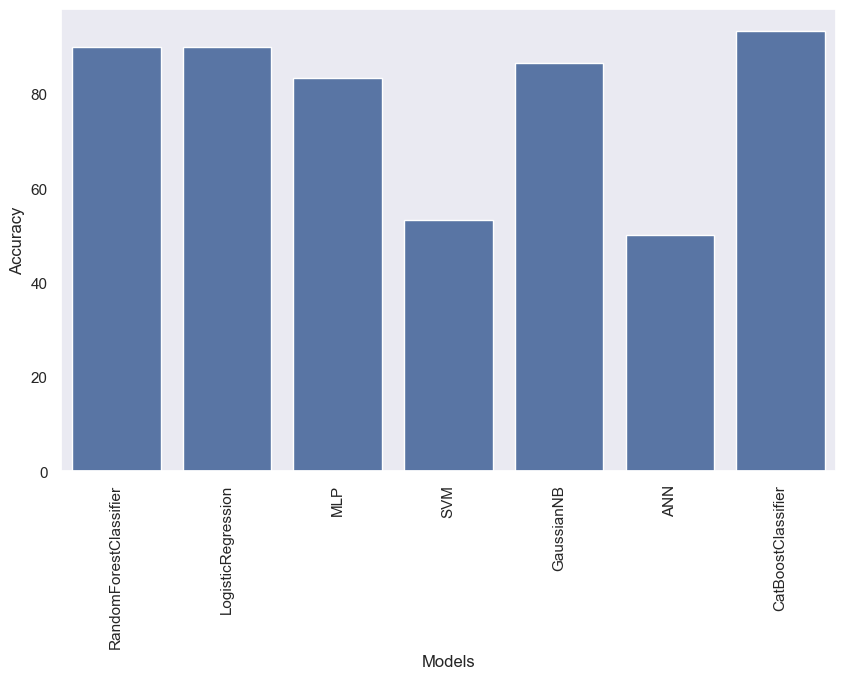

In [119]:
plt.figure(figsize = (10,6))
sns.barplot(y = graph.Accuracy,x = graph.Models)
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
df[df['Output']==1]

,pH,EC,OC,OM,N,P,K,Zn,Fe,Cu,Mn,Sand,Silt,Clay,CaCO3,CEC,Output
3,8.36,0.02,0.03,0.05,106,6.4,127,0.50,3.1,0.28,2.3,93.9,1.7,4.4,0.00,1.60,1
4,8.36,1.08,0.03,0.05,96,10.5,96,0.31,3.2,0.23,4.1,91.5,4.1,4.4,9.08,7.21,1
5,8.36,0.73,0.03,0.05,151,10.5,230,0.38,2.5,0.37,4.2,94.2,1.5,4.3,6.23,3.34,1
6,7.69,0.11,0.04,0.06,112,8.0,120,0.51,3.1,0.32,1.2,96.2,1.7,2.1,0.00,1.72,1
7,8.39,0.06,0.04,0.06,125,18.5,145,0.67,2.8,0.18,1.8,87.9,4.8,7.3,0.00,7.34,1
10,8.26,0.11,0.04,0.06,114,12.0,276,0.89,6.1,0.45,4.8,91.2,4.0,4.8,0.00,2.80,1
14,8.38,0.10,0.06,0.10,125,7.1,198,0.48,4.2,0.15,0.8,88.8,4.9,6.3,4.80,2.40,1
15,8.37,0.12,0.06,0.10,120,3.2,288,0.41,3.3,0.35,3.1,86.9,7.1,6.0,0.00,5.60,1
16,8.52,0.10,0.06,0.10,128,7.9,260,0.52,4.0,0.22,4.2,91.1,4.1,4.8,15.12,2.60,1
17,8.67,0.23,0.07,0.12,134,10.4,410,0.34,2.5,0.11,0.4,88.6,4.2,7.2,0.00,2.82,1


# Prediction

In [120]:
prediction = [[7.74,0.40,0.01,0.01,75,20.00,279,0.48,6.4,0.21,4.7,84.3,6.8,8.9,6.72,7.81]]

In [121]:
result = rf_Classifier.predict(prediction)

C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [122]:
if result == 0:
    print('Non Fertile')
elif result == 1:
    print('Fertile')

Non Fertile


In [123]:
prediction1 = [[8.36,0.02,0.03,0.05,106,6.4,127,0.50,3.1,0.28,2.3,93.9,1.7,4.4,0.00,1.60]]

In [124]:
result1 =  rf_Classifier.predict(prediction1)


C:\Users\0420\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [125]:
if result1 == 0:
    print('Non Fertile')
elif result1 == 1:
    print('Fertile')

Fertile


# $$ *********THE - END*********$$